In [1]:
import sys
import json
import dill

import numpy as np

sys.path.append('../src')

In [2]:
import pandas as pd

BATCH_PATH = 'batches/Batch_4386904_batch_results_1.csv_corrected.csv'
CATEGORY_DICTIONARY = {'Adoring': 'Affection', 'Affectionate': 'Affection', 'Caring': 'Affection', 'Cuddly': 'Affection', 'Infatuated': 'Affection', 'Loving': 'Affection', 'Needy': 'Affection', 'Passionate': 'Affection', 'Supportive': 'Affection', 'Angry': 'Anger', 'Annoyed': 'Anger', 'Bitter': 'Anger', 'Disgusted': 'Anger', 'Done': 'Anger', 'Frustrated': 'Anger', 'Furious': 'Anger', 'Irritated': 'Anger', 'Jealous': 'Anger', 'Adventurous': 'Creativity', 'Artistic': 'Creativity', 'Creative': 'Creativity', 'Dreamy': 'Creativity', 'Imaginative': 'Creativity', 'Inspired': 'Creativity', 'Musical': 'Creativity', 'Poetic': 'Creativity', 'Spacey': 'Creativity', 'Thoughtful': 'Creativity', 'Afraid': 'Fear', 'Anxious': 'Fear', 'Awkward': 'Fear', 'Impatient': 'Fear', 'Insecure': 'Fear', 'Nervous': 'Fear', 'Overwhelmed': 'Fear', 'Shy': 'Fear', 'Stressed': 'Fear', 'Uncomfortable': 'Fear', 'Worried': 'Fear', 'Bored': 'Feelings', 'Guilty': 'Feelings', 'Hungry': 'Feelings', 'Hurt': 'Feelings', 'Lazy': 'Feelings', 'Meh': 'Feelings', 'Nostalgic': 'Feelings', 'Sick': 'Feelings', 'Sleepy': 'Feelings', 'Tired': 'Feelings', 'Upset': 'Feelings', 'Amused': 'Happiness', 'Calm': 'Happiness', 'Chill': 'Happiness', 'Content': 'Happiness', 'Excited': 'Happiness', 'Happy': 'Happiness', 'Proud': 'Happiness', 'Relaxed': 'Happiness', 'Relieved': 'Happiness', 'Confident': 'Positivity', 'Determined': 'Positivity', 'Hopeful': 'Positivity', 'Hyped': 'Positivity', 'Motivated': 'Positivity', 'Optimistic': 'Positivity', 'Safe': 'Positivity', 'Strong': 'Positivity', 'Thankful': 'Positivity', 'Ashamed': 'Sadness', 'Disappointed': 'Sadness', 'Empty': 'Sadness', 'Exhausted': 'Sadness', 'Heartbroken': 'Sadness', 'Lonely': 'Sadness', 'Lost': 'Sadness', 'Miserable': 'Sadness', 'Numb': 'Sadness', 'Sad': 'Sadness', 'Sorry': 'Sadness', 'Amazed': 'Surprise', 'Astonished': 'Surprise', 'Conflicted': 'Surprise', 'Confused': 'Surprise', 'Curious': 'Surprise', 'Embarrassed': 'Surprise', 'Interested': 'Surprise', 'Shocked': 'Surprise', 'Surprised': 'Surprise'}

dataset = pd.read_csv(BATCH_PATH)

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1200)
pd.set_option('display.max_colwidth', 1024)

In [4]:
approved_df = dataset[dataset.Approve == 'x']
responses_df = approved_df.groupby(['HITId', 'Input.INSTANCE_DATA']).agg({'Answer.currentAnnotation': list})
responses_df = responses_df.reset_index()

annotations = []
for i, row in responses_df.iterrows():
    hit = row.HITId
    instance = json.loads(row['Input.INSTANCE_DATA'])
    judgements = [value.split(',') for value in row['Answer.currentAnnotation']]
    for i, value in enumerate(instance):
        text = value['text']
        emotion = value['emotion']
        instance_judgements = [values[i] for values in judgements]
        #predicted_judgements = predict_categories(text)
        annotations.append({
            'text': text,
            'emotion': emotion,
            'category': CATEGORY_DICTIONARY[emotion],
            #'pred_judgements': predicted_judgements,
            #'pred_category_judgements': [CATEGORY_DICTIONARY[emo] for emo in predicted_judgements],
            'judgements': instance_judgements,
            'category_judgements': [CATEGORY_DICTIONARY[emo] for emo in instance_judgements]
        })

annotations_df = pd.DataFrame(annotations)
annotations_df

,text,emotion,category,judgements,category_judgements
0,"On average, people fall in love seven times before getting married.",Uncomfortable,Fear,"[Thoughtful, Passionate, Conflicted, Sleepy, Shocked]","[Creativity, Affection, Surprise, Feelings, Surprise]"
1,Pfp is today's effort. Almost done. Leather seat too😍😍😍 I hate the part where I part with them😔,Creative,Creativity,"[Content, Insecure, Creative, Hyped, Disappointed]","[Happiness, Fear, Creativity, Positivity, Sadness]"
2,So happy to go back to Canada tomorrow and to be home so tired of being here,Excited,Happiness,"[Excited, Amused, Content, Proud, Relieved]","[Happiness, Happiness, Happiness, Happiness, Happiness]"
3,The whole point if buying those type of crayons was that they werent so weird,Sad,Sadness,"[Confused, Creative, Dreamy, Confused, Embarrassed]","[Surprise, Creativity, Creativity, Surprise, Surprise]"
4,AND THEN AN OLD CONNECT HIT ME UP ABOUT AN ACTING INSTRUCTOR HE HIGHLY RECOMMENDED OMG YES,Happy,Happiness,"[Excited, Artistic, Lazy, Annoyed, Excited]","[Happiness, Creativity, Feelings, Anger, Happiness]"
...,...,...,...,...,...
2635,Look guys A smiling mustache :3 He likes to smile ^-^,Optimistic,Positivity,"[Happy, Amused, Infatuated, Imaginative, Amused]","[Happiness, Happiness, Affection, Creativity, Happiness]"
2636,I think it's starting to hit me that I'm actually physically really going to be moving out THIS FUCKING WEEKEND and im going to be 5 HOURS AWAY FROM HOME,Nervous,Fear,"[Upset, Safe, Bitter, Frustrated, Frustrated]","[Feelings, Positivity, Anger, Anger, Anger]"
2637,I need to get ready for school in 10 minutes but I’m fucking crying,Overwhelmed,Fear,"[Anxious, Afraid, Overwhelmed, Anxious, Empty]","[Fear, Fear, Fear, Fear, Sadness]"
2638,I love when someone remembers something I told them long time ago.,Proud,Happiness,"[Content, Passionate, Affectionate, Loving, Hopeful]","[Happiness, Affection, Affection, Affection, Positivity]"


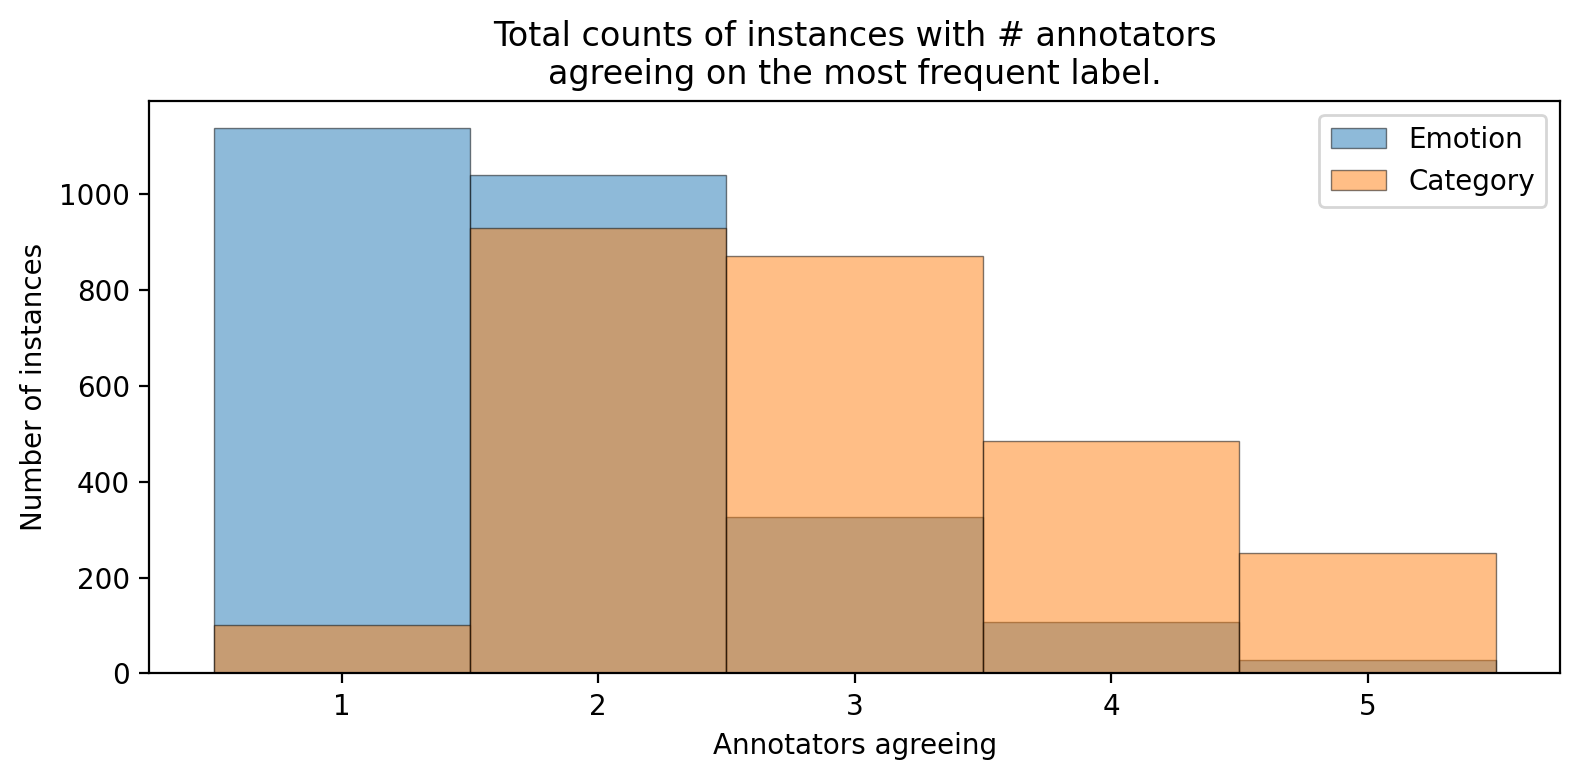

Emotion-level agreement: 1.81 (±0.88)
Category-level agreement: 2.95 (±1.03)


In [11]:
from matplotlib import pyplot as plt
from collections import Counter

def get_overlap_factor(annotations):
    anno_counts = Counter(annotations).most_common()
    return anno_counts[0][1]

emotion_overlaps = [get_overlap_factor(j) for j in annotations_df.judgements]
category_overlaps = [get_overlap_factor(j) for j in annotations_df.category_judgements]

plt.figure(figsize=(8, 4), dpi=200)
plt.title('Total counts of instances with # annotators\nagreeing on the most frequent label.')
plt.xlabel('Annotators agreeing')
plt.ylabel('Number of instances')
plt.xticks(np.arange(1.5, 5.6, 1), [str(int(x)) for x in np.arange(1, 5.1, 1)])
plt.hist(emotion_overlaps, 
         bins=np.arange(1, 6.1, 1), alpha=0.5, edgecolor='black', linewidth=0.5)
plt.hist(category_overlaps, 
         bins=np.arange(1, 6.1, 1), alpha=0.5, edgecolor='black', linewidth=0.5)
plt.legend(['Emotion', 'Category'])

plt.tight_layout()
plt.savefig('../output/MTurkAnnotatorAgreement.pdf')
plt.show()

emotion_agreement = np.mean(emotion_overlaps)
emotion_std = np.std(emotion_overlaps)
category_agreement = np.mean(category_overlaps)
category_std = np.std(category_overlaps)

print(f'Emotion-level agreement: {emotion_agreement:.2f} (±{emotion_std:.2f})')
print(f'Category-level agreement: {category_agreement:.2f} (±{category_std:.2f})')